In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Helper functions to map grades

In [392]:

grade_mapping = {
    "A+": 4.0,
    "A": 4.0,
    "A-": 3.7,
    "B+": 3.3,
    "B": 3.0,
    "B-": 2.7,
    "C+": 2.3,
    "C": 2.0,
    "C-": 1.7,
    "D+": 1.3,
    "D": 1.0,
    "D-": 0.0,
    "E": 0.0,
    "ab": 0.0,
    None: None
}

def map_grade(grade):
    return grade_mapping.get(grade, None)


def get_credit_value(course_code):
    return int(course_code[4])


# The highest value for continous assessment marks, continous assessment marks are divided by this to make a value between 0 and 1 to make value more standarized.
CA_HIGHEST= 35


## Pre-processing Semester 1 Data

In [393]:
df1= pd.read_csv("C:/Users/NYA/Desktop/XGBoost/With GPA/Dataset/sem1.csv")
def extract_course_data_sem1(row):
    course_data = {}
    for col in df1.columns:
        if "CO" in col:
            course_code = col[:6]
            if course_code not in course_data:
                course_data[course_code] = {
                    'ca': row.get(course_code + "_CA"),
                    'grade': row.get(course_code),
                    'attendance': row.get(course_code + "_attendance"),
                    'credit': get_credit_value(course_code)
                }
    return course_data


def process_row(row):
    course_data = extract_course_data_sem1(row)
    new_row = {
        "Gender": row['Gender'],
        "Study Hours": row['Study Hours'],
        "Extracurricular_Involvement": row['Extracurricular_Involvement'],
        "Part time job": row['Part time job'],
        "Struggle with English": row['Struggle with English'],
        "Year": 'first',
        "Pass/Fail" : row['1sem_pass/fail'],
        "Previous_GPA" : 4

    }

    one_credit_courses = [course for course in course_data.values() if course['credit'] == 1]
    for i, course in enumerate(one_credit_courses, start=1):
        new_row[f"one_credit_course_{i}_ca"] = course['ca']/CA_HIGHEST
        new_row[f"one_credit_course_{i}_grade"] = map_grade(course['grade'])
        new_row[f"one_credit_course_{i}_attendance"] = course['attendance']

    two_credit_courses = [course for course in course_data.values() if course['credit'] == 2]
    for i, course in enumerate(two_credit_courses, start=1):
        new_row[f"two_credit_course_{i}_ca"] = course['ca']/CA_HIGHEST
        new_row[f"two_credit_course_{i}_grade"] = map_grade(course['grade'])
        new_row[f"two_credit_course_{i}_attendance"] = course['attendance']


    three_credit_courses = [course for course in course_data.values() if course['credit'] == 3]
    for i, course in enumerate(three_credit_courses, start=1):
        new_row[f"three_credit_course_{i}_ca"] = course['ca']/CA_HIGHEST
        new_row[f"three_credit_course_{i}_grade"] = map_grade(course['grade'])
        new_row[f"three_credit_course_{i}_attendance"] = course['attendance']

    return new_row


# Apply the processing function to the dataframe
processed_df1= pd.DataFrame(df1.apply(process_row, axis=1).tolist())
processed_df1.head()



,Gender,Study Hours,Extracurricular_Involvement,Part time job,Struggle with English,Year,Pass/Fail,Previous_GPA,one_credit_course_1_ca,one_credit_course_1_grade,...,two_credit_course_3_attendance,two_credit_course_4_ca,two_credit_course_4_grade,two_credit_course_4_attendance,two_credit_course_5_ca,two_credit_course_5_grade,two_credit_course_5_attendance,two_credit_course_6_ca,two_credit_course_6_grade,two_credit_course_6_attendance
0,Female,2,Yes,No,Yes,first,0,4,0.828571,3.3,...,1,0.857143,2.0,1,0.885714,3.0,1,0.257143,1.7,1
1,Male,1,Yes,Yes,No,first,1,4,0.828571,4.0,...,1,0.600000,3.3,1,0.685714,2.7,1,0.628571,2.0,1
2,Male,2,Yes,Yes,No,first,1,4,0.885714,4.0,...,1,0.800000,4.0,1,0.828571,2.7,1,0.428571,2.0,1
3,Male,4,No,No,No,first,0,4,0.400000,2.7,...,1,0.485714,2.7,1,0.542857,3.0,1,0.514286,2.3,1
4,Male,less than 1 hour,Yes,Yes,Yes,first,0,4,0.342857,4.0,...,1,0.285714,3.3,1,0.428571,4.0,1,0.342857,3.3,1


## Pre-processing Semester 2 Data

In [394]:
df2 = pd.read_csv("C:/Users/NYA/Desktop/XGBoost/With GPA/Dataset/sem2.csv")
def extract_course_data_sem2(row):
    course_data = {}
    for col in df2.columns:
        if "CO" in col:
            course_code = col[:6]
            if course_code not in course_data:
                course_data[course_code] = {
                    'ca': row.get(course_code + "_CA"),
                    'grade': row.get(course_code),
                    'attendance': row.get(course_code + "_attendance"),
                    'credit': get_credit_value(course_code)
                }
    return course_data


def process_row(row):
    course_data = extract_course_data_sem2(row)
    new_row = {
        "Gender": row['Gender'],
        "Study Hours": row['Study Hours'],
        "Extracurricular_Involvement": row['Extracurricular_Involvement'],
        "Part time job": row['Part time job'],
        "Struggle with English": row['Struggle with English'],
        "Year": 'first',
        "Pass/Fail" : row['2sem_pass/fail'],
         "Previous_GPA" : row['1st_sem_GPA']
    }

    one_credit_courses = [course for course in course_data.values() if course['credit'] == 1]
    for i, course in enumerate(one_credit_courses, start=1):
        new_row[f"one_credit_course_{i}_ca"] = course['ca']/CA_HIGHEST
        new_row[f"one_credit_course_{i}_grade"] = map_grade(course['grade'])
        new_row[f"one_credit_course_{i}_attendance"] = course['attendance']

    two_credit_courses = [course for course in course_data.values() if course['credit'] == 2]
    for i, course in enumerate(two_credit_courses, start=1):
        new_row[f"two_credit_course_{i}_ca"] = course['ca']/CA_HIGHEST
        new_row[f"two_credit_course_{i}_grade"] = map_grade(course['grade'])
        new_row[f"two_credit_course_{i}_attendance"] = course['attendance']


    three_credit_courses = [course for course in course_data.values() if course['credit'] == 3]
    for i, course in enumerate(three_credit_courses, start=1):
        new_row[f"three_credit_course_{i}_ca"] = course['ca']/CA_HIGHEST
        new_row[f"three_credit_course_{i}_grade"] = map_grade(course['grade'])
        new_row[f"three_credit_course_{i}_attendance"] = course['attendance']

    return new_row



processed_df2= pd.DataFrame(df2.apply(process_row, axis=1).tolist())
processed_df2.head()
processed_df2.columns

Index(['Gender', 'Study Hours', 'Extracurricular_Involvement', 'Part time job',
       'Struggle with English', 'Year', 'Pass/Fail', 'Previous_GPA',
       'one_credit_course_1_ca', 'one_credit_course_1_grade',
       'one_credit_course_1_attendance', 'one_credit_course_2_ca',
       'one_credit_course_2_grade', 'one_credit_course_2_attendance',
       'one_credit_course_3_ca', 'one_credit_course_3_grade',
       'one_credit_course_3_attendance', 'two_credit_course_1_ca',
       'two_credit_course_1_grade', 'two_credit_course_1_attendance',
       'two_credit_course_2_ca', 'two_credit_course_2_grade',
       'two_credit_course_2_attendance', 'two_credit_course_3_ca',
       'two_credit_course_3_grade', 'two_credit_course_3_attendance',
       'two_credit_course_4_ca', 'two_credit_course_4_grade',
       'two_credit_course_4_attendance', 'two_credit_course_5_ca',
       'two_credit_course_5_grade', 'two_credit_course_5_attendance',
       'two_credit_course_6_ca', 'two_credit_course_6_g

## Pre-processing Semester 3 Data

In [395]:
df3 = pd.read_csv("C:/Users/NYA/Desktop/XGBoost/With GPA/Dataset/sem3.csv")
def extract_course_data_sem3(row):
    course_data = {}
    for col in df3.columns:
        if "CO" in col:
            course_code = col[:6]
            if course_code not in course_data:
                course_data[course_code] = {
                    'ca': row.get(course_code + "_CA"),
                    'grade': row.get(course_code),
                    'attendance': row.get(course_code + "_attendance"),
                    'credit': get_credit_value(course_code)
                }
    return course_data


def process_row(row):
    course_data = extract_course_data_sem3(row)
    new_row = {
        "Gender": row['Gender'],
        "Study Hours": row['Study Hours'],
        "Extracurricular_Involvement": row['Extracurricular_Involvement'],
        "Part time job": row['Part time job'],
        "Struggle with English": row['Struggle with English'],
        "Year": 'second',
        "Pass/Fail" : row['3sem_pass/fail'],
         "Previous_GPA" : row['2nd_sem_GPA']
    }

    one_credit_courses = [course for course in course_data.values() if course['credit'] == 1]
    for i, course in enumerate(one_credit_courses, start=1):
        new_row[f"one_credit_course_{i}_ca"] = course['ca']/CA_HIGHEST
        new_row[f"one_credit_course_{i}_grade"] = map_grade(course['grade'])
        new_row[f"one_credit_course_{i}_attendance"] = course['attendance']

    two_credit_courses = [course for course in course_data.values() if course['credit'] == 2]
    for i, course in enumerate(two_credit_courses, start=1):
        new_row[f"two_credit_course_{i}_ca"] = course['ca']/CA_HIGHEST
        new_row[f"two_credit_course_{i}_grade"] = map_grade(course['grade'])
        new_row[f"two_credit_course_{i}_attendance"] = course['attendance']


    three_credit_courses = [course for course in course_data.values() if course['credit'] == 3]
    for i, course in enumerate(three_credit_courses, start=1):
        new_row[f"three_credit_course_{i}_ca"] = course['ca']/CA_HIGHEST
        new_row[f"three_credit_course_{i}_grade"] = map_grade(course['grade'])
        new_row[f"three_credit_course_{i}_attendance"] = course['attendance']

    return new_row



processed_df3= pd.DataFrame(df3.apply(process_row, axis=1).tolist())
processed_df3.head()
processed_df3.columns

Index(['Gender', 'Study Hours', 'Extracurricular_Involvement', 'Part time job',
       'Struggle with English', 'Year', 'Pass/Fail', 'Previous_GPA',
       'one_credit_course_1_ca', 'one_credit_course_1_grade',
       'one_credit_course_1_attendance', 'one_credit_course_2_ca',
       'one_credit_course_2_grade', 'one_credit_course_2_attendance',
       'one_credit_course_3_ca', 'one_credit_course_3_grade',
       'one_credit_course_3_attendance', 'two_credit_course_1_ca',
       'two_credit_course_1_grade', 'two_credit_course_1_attendance',
       'two_credit_course_2_ca', 'two_credit_course_2_grade',
       'two_credit_course_2_attendance', 'two_credit_course_3_ca',
       'two_credit_course_3_grade', 'two_credit_course_3_attendance',
       'two_credit_course_4_ca', 'two_credit_course_4_grade',
       'two_credit_course_4_attendance', 'two_credit_course_5_ca',
       'two_credit_course_5_grade', 'two_credit_course_5_attendance',
       'two_credit_course_6_ca', 'two_credit_course_6_g

## Pre-processing Semester 4 **Data**

In [396]:
df4 = pd.read_csv("C:/Users/NYA/Desktop/XGBoost/With GPA/Dataset/sem4.csv")
def extract_course_data_sem4(row):
    course_data = {}
    for col in df4.columns:
        if "CO" in col:
            course_code = col[:6]
            if course_code not in course_data:
                course_data[course_code] = {
                    'ca': row.get(course_code + "_CA"),
                    'grade': row.get(course_code),
                    'attendance': row.get(course_code + "_attendance"),
                    'credit': get_credit_value(course_code)
                }
    return course_data


def process_row(row):
    course_data = extract_course_data_sem4(row)
    new_row = {
        "Gender": row['Gender'],
        "Study Hours": row['Study Hours'],
        "Extracurricular_Involvement": row['Extracurricular_Involvement'],
        "Part time job": row['Part time job'],
        "Struggle with English": row['Struggle with English'],
        "Year": 'second',
        "Pass/Fail" : row['4sem_pass/fail'],
         "Previous_GPA" : row['3rd_sem_GPA']
    }

    one_credit_courses = [course for course in course_data.values() if course['credit'] == 1]
    for i, course in enumerate(one_credit_courses, start=1):
        new_row[f"one_credit_course_{i}_ca"] = course['ca']/CA_HIGHEST
        new_row[f"one_credit_course_{i}_grade"] = map_grade(course['grade'])
        new_row[f"one_credit_course_{i}_attendance"] = course['attendance']

    two_credit_courses = [course for course in course_data.values() if course['credit'] == 2]
    for i, course in enumerate(two_credit_courses, start=1):
        new_row[f"two_credit_course_{i}_ca"] = course['ca']/CA_HIGHEST
        new_row[f"two_credit_course_{i}_grade"] = map_grade(course['grade'])
        new_row[f"two_credit_course_{i}_attendance"] = course['attendance']


    three_credit_courses = [course for course in course_data.values() if course['credit'] == 3]
    for i, course in enumerate(three_credit_courses, start=1):
        new_row[f"three_credit_course_{i}_ca"] = course['ca']/CA_HIGHEST
        new_row[f"three_credit_course_{i}_grade"] = map_grade(course['grade'])
        new_row[f"three_credit_course_{i}_attendance"] = course['attendance']

    return new_row



processed_df4= pd.DataFrame(df4.apply(process_row, axis=1).tolist())
processed_df4.head()
processed_df4.columns

Index(['Gender', 'Study Hours', 'Extracurricular_Involvement', 'Part time job',
       'Struggle with English', 'Year', 'Pass/Fail', 'Previous_GPA',
       'one_credit_course_1_ca', 'one_credit_course_1_grade',
       'one_credit_course_1_attendance', 'one_credit_course_2_ca',
       'one_credit_course_2_grade', 'one_credit_course_2_attendance',
       'one_credit_course_3_ca', 'one_credit_course_3_grade',
       'one_credit_course_3_attendance', 'two_credit_course_1_ca',
       'two_credit_course_1_grade', 'two_credit_course_1_attendance',
       'two_credit_course_2_ca', 'two_credit_course_2_grade',
       'two_credit_course_2_attendance', 'two_credit_course_3_ca',
       'two_credit_course_3_grade', 'two_credit_course_3_attendance',
       'two_credit_course_4_ca', 'two_credit_course_4_grade',
       'two_credit_course_4_attendance', 'two_credit_course_5_ca',
       'two_credit_course_5_grade', 'two_credit_course_5_attendance',
       'two_credit_course_6_ca', 'two_credit_course_6_g

# Pre-processing Semester 5 Data

In [397]:
df5 = pd.read_csv("C:/Users/NYA/Desktop/XGBoost/With GPA/Dataset/sem5.csv")
def extract_course_data_sem5(row):
    course_data = {}
    for col in df5.columns:
        if "CS" in col:
            course_code = col[:6]
            if course_code not in course_data:
                course_data[course_code] = {
                    'ca': row.get(course_code + "_CA"),
                    'grade': row.get(course_code),
                    'attendance': row.get(course_code + "_attendance"),
                    'credit': get_credit_value(course_code)
                }
    return course_data


def process_row(row):
    course_data = extract_course_data_sem5(row)
    new_row = {
        "Gender": row['Gender'],
        "Study Hours": row['Study Hours'],
        "Extracurricular_Involvement": row['Extracurricular_Involvement'],
        "Part time job": row['Part time job'],
        "Struggle with English": row['Struggle with English'],
        "Year": 'third',
        "Pass/Fail" : row['5sem_pass/fail'],
         "Previous_GPA" : row['4th_sem_GPA']
    }

    one_credit_courses = [course for course in course_data.values() if course['credit'] == 1]
    for i, course in enumerate(one_credit_courses, start=1):
        new_row[f"one_credit_course_{i}_ca"] = course['ca']/CA_HIGHEST
        new_row[f"one_credit_course_{i}_grade"] = map_grade(course['grade'])
        new_row[f"one_credit_course_{i}_attendance"] = course['attendance']

    two_credit_courses = [course for course in course_data.values() if course['credit'] == 2]
    for i, course in enumerate(two_credit_courses, start=1):
        new_row[f"two_credit_course_{i}_ca"] = course['ca']/CA_HIGHEST
        new_row[f"two_credit_course_{i}_grade"] = map_grade(course['grade'])
        new_row[f"two_credit_course_{i}_attendance"] = course['attendance']


    three_credit_courses = [course for course in course_data.values() if course['credit'] == 3]
    for i, course in enumerate(three_credit_courses, start=1):
        new_row[f"three_credit_course_{i}_ca"] = course['ca']/CA_HIGHEST
        new_row[f"three_credit_course_{i}_grade"] = map_grade(course['grade'])
        new_row[f"three_credit_course_{i}_attendance"] = course['attendance']

    return new_row



processed_df5= pd.DataFrame(df5.apply(process_row, axis=1).tolist())
processed_df5.head()
processed_df5.columns

Index(['Gender', 'Study Hours', 'Extracurricular_Involvement', 'Part time job',
       'Struggle with English', 'Year', 'Pass/Fail', 'Previous_GPA',
       'one_credit_course_1_ca', 'one_credit_course_1_grade',
       'one_credit_course_1_attendance', 'one_credit_course_2_ca',
       'one_credit_course_2_grade', 'one_credit_course_2_attendance',
       'one_credit_course_3_ca', 'one_credit_course_3_grade',
       'one_credit_course_3_attendance', 'one_credit_course_4_ca',
       'one_credit_course_4_grade', 'one_credit_course_4_attendance',
       'two_credit_course_1_ca', 'two_credit_course_1_grade',
       'two_credit_course_1_attendance', 'two_credit_course_2_ca',
       'two_credit_course_2_grade', 'two_credit_course_2_attendance',
       'two_credit_course_3_ca', 'two_credit_course_3_grade',
       'two_credit_course_3_attendance', 'two_credit_course_4_ca',
       'two_credit_course_4_grade', 'two_credit_course_4_attendance',
       'three_credit_course_1_ca', 'three_credit_course

## Pre-Processing Semester 6 Data

In [398]:
df6 = pd.read_csv("C:/Users/NYA/Desktop/XGBoost/With GPA/Dataset/sem6.csv")
def extract_course_data_sem6(row):
    course_data = {}
    for col in df6.columns:
        if "CS" in col:
            course_code = col[:6]
            if course_code not in course_data:
                course_data[course_code] = {
                    'ca': row.get(course_code + "_CA"),
                    'grade': row.get(course_code),
                    'attendance': row.get(course_code + "_attendance"),
                    'credit': get_credit_value(course_code)
                }
    return course_data


def process_row(row):
    course_data = extract_course_data_sem6(row)
    new_row = {
        "Gender": row['Gender'],
        "Study Hours": row['Study Hours'],
        "Extracurricular_Involvement": row['Extracurricular_Involvement'],
        "Part time job": row['Part time job'],
        "Struggle with English": row['Struggle with English'],
        "Year": 'third',
        "Pass/Fail" : row['6sem_pass/fail'],
         "Previous_GPA" : row['5th_sem_GPA']
    }

    one_credit_courses = [course for course in course_data.values() if course['credit'] == 1]
    for i, course in enumerate(one_credit_courses, start=1):
        new_row[f"one_credit_course_{i}_ca"] = course['ca']/CA_HIGHEST
        new_row[f"one_credit_course_{i}_grade"] = map_grade(course['grade'])
        new_row[f"one_credit_course_{i}_attendance"] = course['attendance']

    two_credit_courses = [course for course in course_data.values() if course['credit'] == 2]
    for i, course in enumerate(two_credit_courses, start=1):
        new_row[f"two_credit_course_{i}_ca"] = course['ca']/CA_HIGHEST
        new_row[f"two_credit_course_{i}_grade"] = map_grade(course['grade'])
        new_row[f"two_credit_course_{i}_attendance"] = course['attendance']


    three_credit_courses = [course for course in course_data.values() if course['credit'] == 3]
    for i, course in enumerate(three_credit_courses, start=1):
        new_row[f"three_credit_course_{i}_ca"] = course['ca']/CA_HIGHEST
        new_row[f"three_credit_course_{i}_grade"] = map_grade(course['grade'])
        new_row[f"three_credit_course_{i}_attendance"] = course['attendance']

    return new_row



processed_df6= pd.DataFrame(df6.apply(process_row, axis=1).tolist())
processed_df6.head()

,Gender,Study Hours,Extracurricular_Involvement,Part time job,Struggle with English,Year,Pass/Fail,Previous_GPA,one_credit_course_1_ca,one_credit_course_1_grade,...,two_credit_course_2_attendance,two_credit_course_3_ca,two_credit_course_3_grade,two_credit_course_3_attendance,three_credit_course_1_ca,three_credit_course_1_grade,three_credit_course_1_attendance,three_credit_course_2_ca,three_credit_course_2_grade,three_credit_course_2_attendance
0,Female,2,Yes,No,Yes,third,1,2.806667,0.257143,4.0,...,1,0.800000,2.7,1,0.571429,2.7,1,0.771429,4.0,1
1,Male,1,Yes,Yes,No,third,0,2.411667,0.342857,4.0,...,1,0.542857,2.0,1,0.542857,1.7,1,0.742857,2.7,1
2,Male,2,Yes,Yes,No,third,1,3.218333,0.628571,4.0,...,1,0.571429,2.0,1,0.714286,4.0,1,0.714286,2.7,1
3,Male,4,No,No,No,third,0,1.788333,0.542857,4.0,...,1,0.142857,1.7,1,0.228571,1.3,1,0.714286,2.7,1
4,Male,less than 1 hour,Yes,Yes,Yes,third,1,3.095000,0.571429,3.7,...,1,0.628571,3.0,1,0.714286,3.3,1,0.685714,3.0,1


In [399]:
dataframe = pd.concat([processed_df1, processed_df2, processed_df3, processed_df4, processed_df5, processed_df6], ignore_index=True)
dataframe.shape

(1134, 44)

In [400]:
dataframe.columns

Index(['Gender', 'Study Hours', 'Extracurricular_Involvement', 'Part time job',
       'Struggle with English', 'Year', 'Pass/Fail', 'Previous_GPA',
       'one_credit_course_1_ca', 'one_credit_course_1_grade',
       'one_credit_course_1_attendance', 'one_credit_course_2_ca',
       'one_credit_course_2_grade', 'one_credit_course_2_attendance',
       'one_credit_course_3_ca', 'one_credit_course_3_grade',
       'one_credit_course_3_attendance', 'two_credit_course_1_ca',
       'two_credit_course_1_grade', 'two_credit_course_1_attendance',
       'two_credit_course_2_ca', 'two_credit_course_2_grade',
       'two_credit_course_2_attendance', 'two_credit_course_3_ca',
       'two_credit_course_3_grade', 'two_credit_course_3_attendance',
       'two_credit_course_4_ca', 'two_credit_course_4_grade',
       'two_credit_course_4_attendance', 'two_credit_course_5_ca',
       'two_credit_course_5_grade', 'two_credit_course_5_attendance',
       'two_credit_course_6_ca', 'two_credit_course_6_g

In [401]:
#filling NAN values with 0
dataframe.fillna(0, inplace=True)
dataframe.head()

,Gender,Study Hours,Extracurricular_Involvement,Part time job,Struggle with English,Year,Pass/Fail,Previous_GPA,one_credit_course_1_ca,one_credit_course_1_grade,...,two_credit_course_6_attendance,one_credit_course_4_ca,one_credit_course_4_grade,one_credit_course_4_attendance,three_credit_course_1_ca,three_credit_course_1_grade,three_credit_course_1_attendance,three_credit_course_2_ca,three_credit_course_2_grade,three_credit_course_2_attendance
0,Female,2,Yes,No,Yes,first,0,4.0,0.828571,3.3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Male,1,Yes,Yes,No,first,1,4.0,0.828571,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Male,2,Yes,Yes,No,first,1,4.0,0.885714,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Male,4,No,No,No,first,0,4.0,0.400000,2.7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Male,less than 1 hour,Yes,Yes,Yes,first,0,4.0,0.342857,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Pre-processing Study Hour column

In [402]:
# Replace the string 'less than 1 hour' with a suitable numerical value by, 0.5
dataframe['Study Hours'] = dataframe['Study Hours'].replace('less than 1 hour', 0.5)
# Replace the string 'less than 1 hour' with a suitable numerical value by, 6.5
dataframe['Study Hours'] = dataframe['Study Hours'].replace('more than 6 hours',6.5)
print(dataframe['Study Hours'].head())


0      2
1      1
2      2
3      4
4    0.5
Name: Study Hours, dtype: object


In [403]:
dataframe.columns
#shuffle the dataframe
dataframe = dataframe.sample(frac = 1)

## Selecting Feature Set and Independent Variables

In [404]:
y = dataframe['Pass/Fail']  # Target variable

# Define the feature columns (all columns except Pass/Fail)
X = dataframe.drop('Pass/Fail', axis=1)  # Features

# Check the shape of X and y to ensure they were separated correctly
print(X.shape)
print(y.shape)

(1134, 43)
(1134,)


## One Hot Encoder to deal with Categorical Data

In [405]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,2,3,4,5])], remainder='passthrough')
X= np.array(ct.fit_transform(X))
X.shape

(1134, 49)

### Splitting the data into Train and Test Set

In [406]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Feature Engineering for identify most important features of Feature Set

In [407]:
from sklearn.ensemble import RandomForestRegressor  # Example model

# Train a RandomForestRegressor (you can use any other model like RandomForestClassifier if it's classification)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_

# Get the names of the encoded features from the ColumnTransformer
# Categorical features were one-hot encoded, so we get the new feature names
encoded_feature_names = ct.get_feature_names_out()

# Combine the encoded feature names with their importance
feature_importance = pd.DataFrame({
    'feature': encoded_feature_names,
    'importance': importances
})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Display the feature importance
print(feature_importance)




                                        feature  importance
26         remainder__two_credit_course_2_grade    0.354395
29         remainder__two_credit_course_3_grade    0.131488
38         remainder__two_credit_course_6_grade    0.115998
17         remainder__one_credit_course_2_grade    0.091645
32         remainder__two_credit_course_4_grade    0.071126
44       remainder__three_credit_course_1_grade    0.058910
23         remainder__two_credit_course_1_grade    0.055419
14         remainder__one_credit_course_1_grade    0.030411
43          remainder__three_credit_course_1_ca    0.021786
20         remainder__one_credit_course_3_grade    0.010420
12                      remainder__Previous_GPA    0.008304
35         remainder__two_credit_course_5_grade    0.006656
34            remainder__two_credit_course_5_ca    0.006459
40            remainder__one_credit_course_4_ca    0.003940
13            remainder__one_credit_course_1_ca    0.003618
37            remainder__two_credit_cour

### Applying a standard scaler

In [408]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)


### Random Forest Classifier

In [409]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_train and X_test have already been scaled
# X_train and X_test are already transformed using StandardScaler

# Define and train the RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report for precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.25      0.39        73
           1       0.74      0.99      0.85       154

    accuracy                           0.75       227
   macro avg       0.84      0.62      0.62       227
weighted avg       0.80      0.75      0.70       227

Confusion Matrix:
[[ 18  55]
 [  1 153]]


In [410]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### XGBoost Classifier

In [411]:
from xgboost import XGBClassifier

# Define and train the XGBoost classifier
xgb_classifier = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_classifier.fit(X_train, y_train)

xgb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report for precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.25      0.39        73
           1       0.74      0.99      0.85       154

    accuracy                           0.75       227
   macro avg       0.84      0.62      0.62       227
weighted avg       0.80      0.75      0.70       227

Confusion Matrix:
[[ 18  55]
 [  1 153]]


C:\Users\NYA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [09:20:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Decision Tree Classifier

In [412]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report for precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.25      0.39        73
           1       0.74      0.99      0.85       154

    accuracy                           0.75       227
   macro avg       0.84      0.62      0.62       227
weighted avg       0.80      0.75      0.70       227

Confusion Matrix:
[[ 18  55]
 [  1 153]]


In [413]:
dataframe.columns

Index(['Gender', 'Study Hours', 'Extracurricular_Involvement', 'Part time job',
       'Struggle with English', 'Year', 'Pass/Fail', 'Previous_GPA',
       'one_credit_course_1_ca', 'one_credit_course_1_grade',
       'one_credit_course_1_attendance', 'one_credit_course_2_ca',
       'one_credit_course_2_grade', 'one_credit_course_2_attendance',
       'one_credit_course_3_ca', 'one_credit_course_3_grade',
       'one_credit_course_3_attendance', 'two_credit_course_1_ca',
       'two_credit_course_1_grade', 'two_credit_course_1_attendance',
       'two_credit_course_2_ca', 'two_credit_course_2_grade',
       'two_credit_course_2_attendance', 'two_credit_course_3_ca',
       'two_credit_course_3_grade', 'two_credit_course_3_attendance',
       'two_credit_course_4_ca', 'two_credit_course_4_grade',
       'two_credit_course_4_attendance', 'two_credit_course_5_ca',
       'two_credit_course_5_grade', 'two_credit_course_5_attendance',
       'two_credit_course_6_ca', 'two_credit_course_6_g

## Model training only with continous assessment marks and other features except final grades of subjects

In [414]:
filtered_dataframe = dataframe[[col for col in dataframe.columns if 'grade' not in col]]
filtered_dataframe.columns
filtered_dataframe.shape

(1134, 32)

In [415]:
y = filtered_dataframe['Pass/Fail']  # Target variable

# Define the feature columns (all columns except Pass/Fail)
X = filtered_dataframe.drop('Pass/Fail', axis=1)  # Features

# Check the shape of X and y to ensure they were separated correctly
print(X.shape)
print(y.shape)



(1134, 31)
(1134,)


In [416]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
print("X Shape :{}" ,X.shape)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(categories = "auto", handle_unknown = "ignore"), [0,2,3,4,5])], remainder='passthrough')
X= np.array(ct.fit_transform(X))
print(X.shape)


X Shape :{} (1134, 31)
(1134, 37)


In [417]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [418]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train.shape

(907, 37)

In [419]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_train and X_test have already been scaled
# X_train and X_test are already transformed using StandardScaler

# Define and train the RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report for precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.68      1.00      0.81       154

    accuracy                           0.68       227
   macro avg       0.34      0.50      0.40       227
weighted avg       0.46      0.68      0.55       227

Confusion Matrix:
[[  0  73]
 [  0 154]]


C:\Users\NYA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NYA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NYA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [420]:
from xgboost import XGBClassifier

# Define and train the XGBoost classifier
xgb_classifier = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_classifier.fit(X_train, y_train)

xgb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report for precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

C:\Users\NYA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [09:20:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.32      0.48        73
           1       0.75      1.00      0.86       154

    accuracy                           0.78       227
   macro avg       0.88      0.66      0.67       227
weighted avg       0.83      0.78      0.74       227

Confusion Matrix:
[[ 23  50]
 [  0 154]]


In [421]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report for precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.45      0.38        73
           1       0.68      0.56      0.61       154

    accuracy                           0.52       227
   macro avg       0.50      0.51      0.50       227
weighted avg       0.57      0.52      0.54       227

Confusion Matrix:
[[33 40]
 [68 86]]


In [422]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from xgboost import XGBClassifier
import numpy as np

# Define and train the XGBoost classifier
xgb_classifier = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)




Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.32      0.48        73
           1       0.75      1.00      0.86       154

    accuracy                           0.78       227
   macro avg       0.88      0.66      0.67       227
weighted avg       0.83      0.78      0.74       227

Confusion Matrix:
[[ 23  50]
 [  0 154]]


C:\Users\NYA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [09:20:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


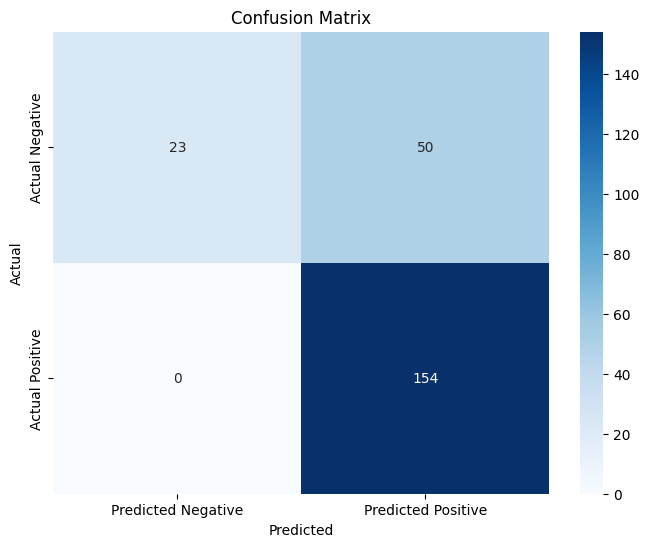

In [423]:
# Plot the Confusion Matrix using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



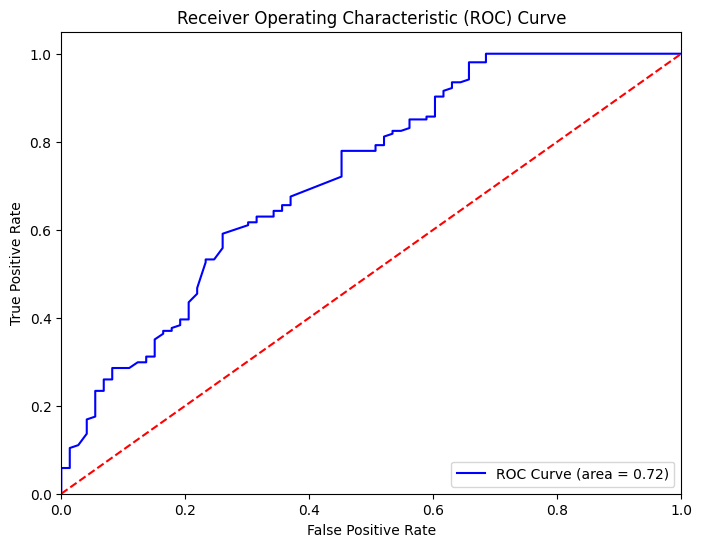

In [424]:
# Plot ROC Curve (for binary classification)
y_prob = xgb_classifier.predict_proba(X_test)[:,1]  # Probability estimates
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



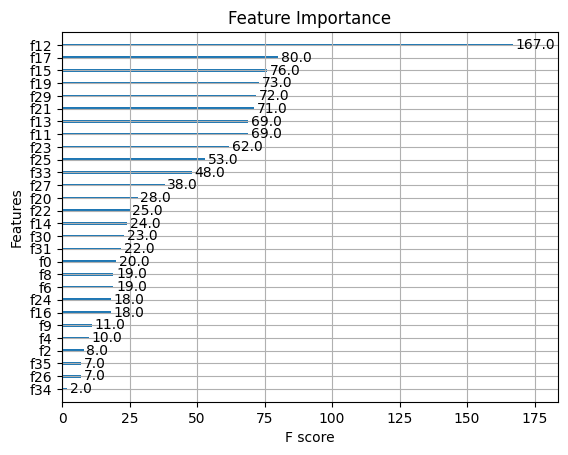

In [425]:
# Feature Importance (corrected)
from xgboost import XGBClassifier, plot_importance  # Correct import for XGBoost plot_importance


plot_importance(xgb_classifier)  # Correct method to plot feature importance
plt.title('Feature Importance')
plt.show()

In [426]:
import pandas as pd
import numpy as np

# Example feature values for a new instance
data = {
    'Gender': ['Male'],
    'Study Hours': [1],
    'Extracurricular_Involvement': ['Yes'],
    'Part time job': ['Yes'],
    'Struggle with English': ['Yes'],
    'Year': ['Second'],
    'Previous_GPA' :  [3.6],
    'one_credit_course_1_ca': [15/35],
    'one_credit_course_1_attendance': [1],
    'one_credit_course_2_ca': [16/35],
    'one_credit_course_2_attendance': [1],
    'one_credit_course_3_ca': [23/35],
    'one_credit_course_3_attendance': [1],
    'two_credit_course_1_ca': [8/35],
    'two_credit_course_1_attendance': [1],
    'two_credit_course_2_ca': [11/35],
    'two_credit_course_2_attendance': [1],
    'two_credit_course_3_ca': [29/35],
    'two_credit_course_3_attendance': [1],
    'two_credit_course_4_ca': [11/35],
    'two_credit_course_4_attendance': [1],
    'two_credit_course_5_ca': [31/35],
    'two_credit_course_5_attendance': [1],
    'two_credit_course_6_ca': [27/35],
    'two_credit_course_6_attendance': [1],
    'one_credit_course_4_ca': [0],
    'one_credit_course_4_attendance': [0],
    'three_credit_course_1_ca': [0],
    'three_credit_course_1_attendance': [0],
    'three_credit_course_2_ca': [0],
    'three_credit_course_2_attendance': [0]
}

In [427]:
#converting data into a df
new_data =pd.DataFrame(data)
new_data

,Gender,Study Hours,Extracurricular_Involvement,Part time job,Struggle with English,Year,Previous_GPA,one_credit_course_1_ca,one_credit_course_1_attendance,one_credit_course_2_ca,...,two_credit_course_5_ca,two_credit_course_5_attendance,two_credit_course_6_ca,two_credit_course_6_attendance,one_credit_course_4_ca,one_credit_course_4_attendance,three_credit_course_1_ca,three_credit_course_1_attendance,three_credit_course_2_ca,three_credit_course_2_attendance
0,Male,1,Yes,Yes,Yes,Second,3.6,0.428571,1,0.457143,...,0.885714,1,0.771429,1,0,0,0,0,0,0


In [428]:
transformed =ct.transform(new_data)
print(transformed)

[[0.         1.         0.         1.         0.         1.
  0.         1.         0.         0.         0.         1.
  3.6        0.42857143 1.         0.45714286 1.         0.65714286
  1.         0.22857143 1.         0.31428571 1.         0.82857143
  1.         0.31428571 1.         0.88571429 1.         0.77142857
  1.         0.         0.         0.         0.         0.
  0.        ]]


In [429]:
scaled_new_data= sc.fit(transformed)
print(scaled_new_data)

StandardScaler()


In [430]:
# Predict the result for the new data
y_pred_new = xgb_classifier.predict(transformed)

# If you want probability estimates for classification
y_prob_new = xgb_classifier.predict_proba(transformed)

# Output the predicted class and probabilities
print(f'Predicted Class: {y_pred_new}')
print(f'Predicted Probabilities: {y_prob_new}')


#predicted class : 1 -> Pass


Predicted Class: [1]
Predicted Probabilities: [[0.0616225 0.9383775]]


### Converting Probabilities into Percentages

In [431]:
# Predict the class for the new data
y_pred_new = xgb_classifier.predict(transformed)

# Get probability estimates for each class
y_prob_new = xgb_classifier.predict_proba(transformed)

# Convert probabilities to percentages
y_prob_new_percentages = y_prob_new * 100

# Iterate through each prediction and probability
for i, (pred, probs) in enumerate(zip(y_pred_new, y_prob_new_percentages)):
    pass_probability = probs[1]  # Probability for class 1 (pass)
    fail_probability = probs[0]  # Probability for class 0 (fail)

    # Display the predicted result with detailed probability information
    print(f"Data Point {i + 1}:")
    print(f"  Predicted Class: {'Pass' if pred == 1 else 'Fail'}")
    print(f"  Probability of Pass: {pass_probability:.2f}%")
    print(f"  Probability of Fail: {fail_probability:.2f}%")
    print("-" * 30)



Data Point 1:
  Predicted Class: Pass
  Probability of Pass: 93.84%
  Probability of Fail: 6.16%
------------------------------


In [432]:
import pickle
with open('trained_model.pkl', 'wb') as model_file:
    pickle.dump(xgb_classifier, model_file)

In [433]:
import pickle
with open('ct_transformer.pkl', 'wb') as model_file2:
    pickle.dump(ct, model_file2)